In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./India_Historical_Population_Density_Data.csv",parse_dates=True, index_col = "year")

In [3]:
df

,Unnamed: 0,popu1ation_growth_rate,Population_Density,growth_rate
year,,,,
2024-01-01,0,"1,441,719,852",438.58,0.92%
2023-01-01,1,"1,428,627,663",434.60,0.81%
2022-01-01,2,"1,417,173,173",431.11,0.68%
2021-01-01,3,"1,407,563,842",428.19,0.80%
2020-01-01,4,"1,396,387,127",424.79,0.96%
...,...,...,...,...
1954-01-01,70,"389,731,406",118.56,2.23%
1953-01-01,71,"381,227,705",115.97,2.21%
1952-01-01,72,"372,997,188",113.47,2.21%


In [4]:
df.drop(["Unnamed: 0","Population_Density","growth_rate"], inplace=True, axis=1)

In [5]:
df

,popu1ation_growth_rate
year,
2024-01-01,"1,441,719,852"
2023-01-01,"1,428,627,663"
2022-01-01,"1,417,173,173"
2021-01-01,"1,407,563,842"
2020-01-01,"1,396,387,127"
...,...
1954-01-01,"389,731,406"
1953-01-01,"381,227,705"
1952-01-01,"372,997,188"


In [6]:
df = df.sort_values(by='year')

In [7]:
df['popu1ation_growth_rate'] = df['popu1ation_growth_rate'].str.replace(',', '').astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 1950-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   popu1ation_growth_rate  75 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [9]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [10]:
result = adfuller(df['popu1ation_growth_rate'])

# Extract and display the test results
adf_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    adf_output['Critical Value (%s)' % key] = value
adf_output
#STATIONARY

Test Statistic                 -4.813052
p-value                         0.000051
#Lags Used                      5.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64

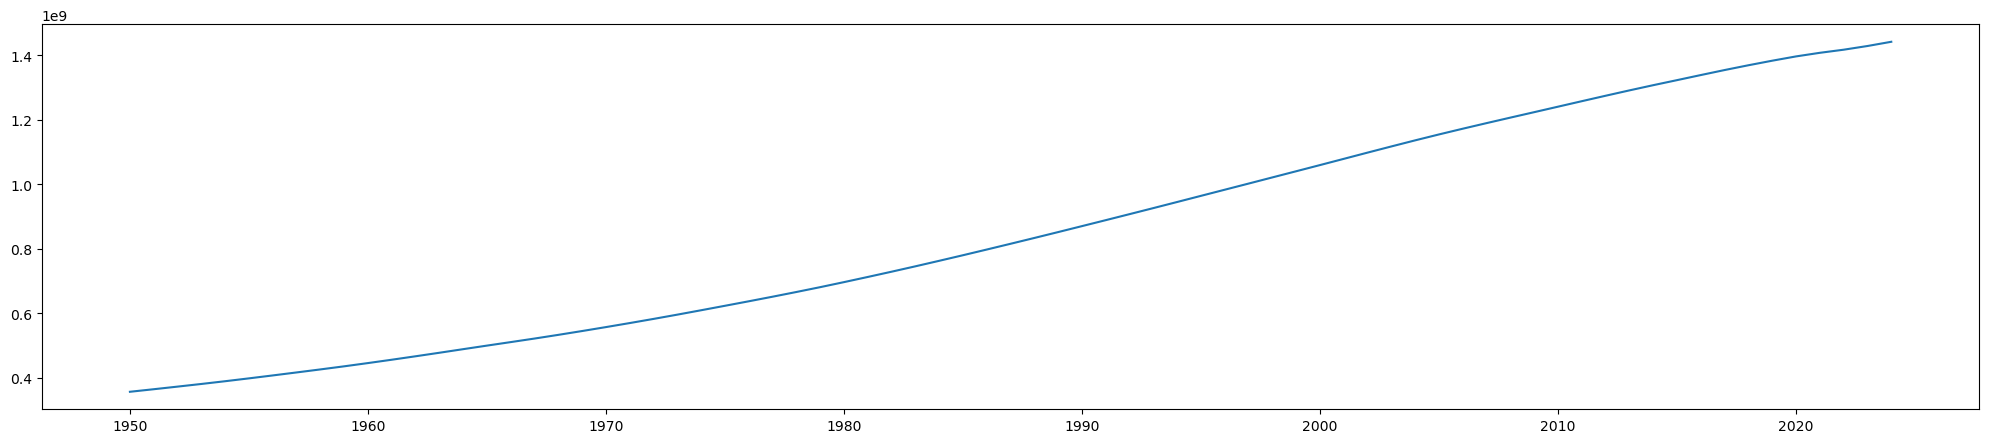

In [11]:
plt.figure(figsize = (25,5))

plt.plot(df)

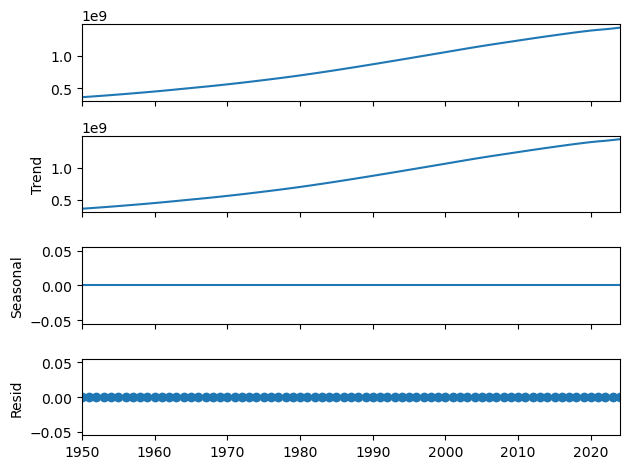

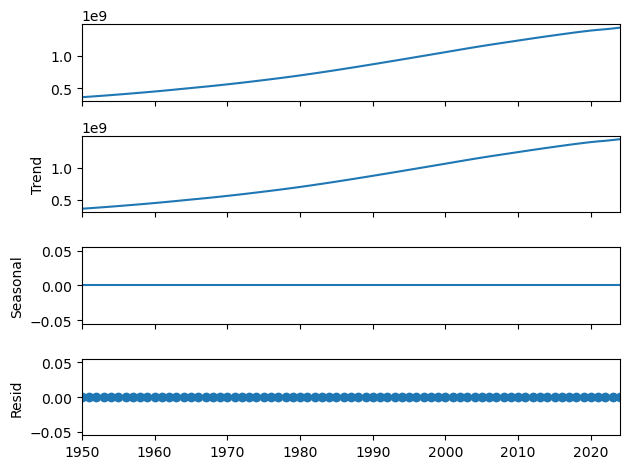

In [12]:
dec = seasonal_decompose(df)
dec.plot()

In [14]:
def preprocess_data(data, lag_start=5, lag_end=10, test_size=0.2):
  for i in range(lag_start,lag_end):
    data[f"lag_{i}"] = data["popu1ation_growth_rate"].shift(i)
  data = data.dropna()
  data["year"] = data.index.year
  X = data.drop("popu1ation_growth_rate",axis=1)
  y = data["popu1ation_growth_rate"]
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,shuffle=False)

  return X_train, X_test, y_train, y_test


C:\Users\Admin\AppData\Local\Temp\ipykernel_1052\3392991982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"] = data.index.year


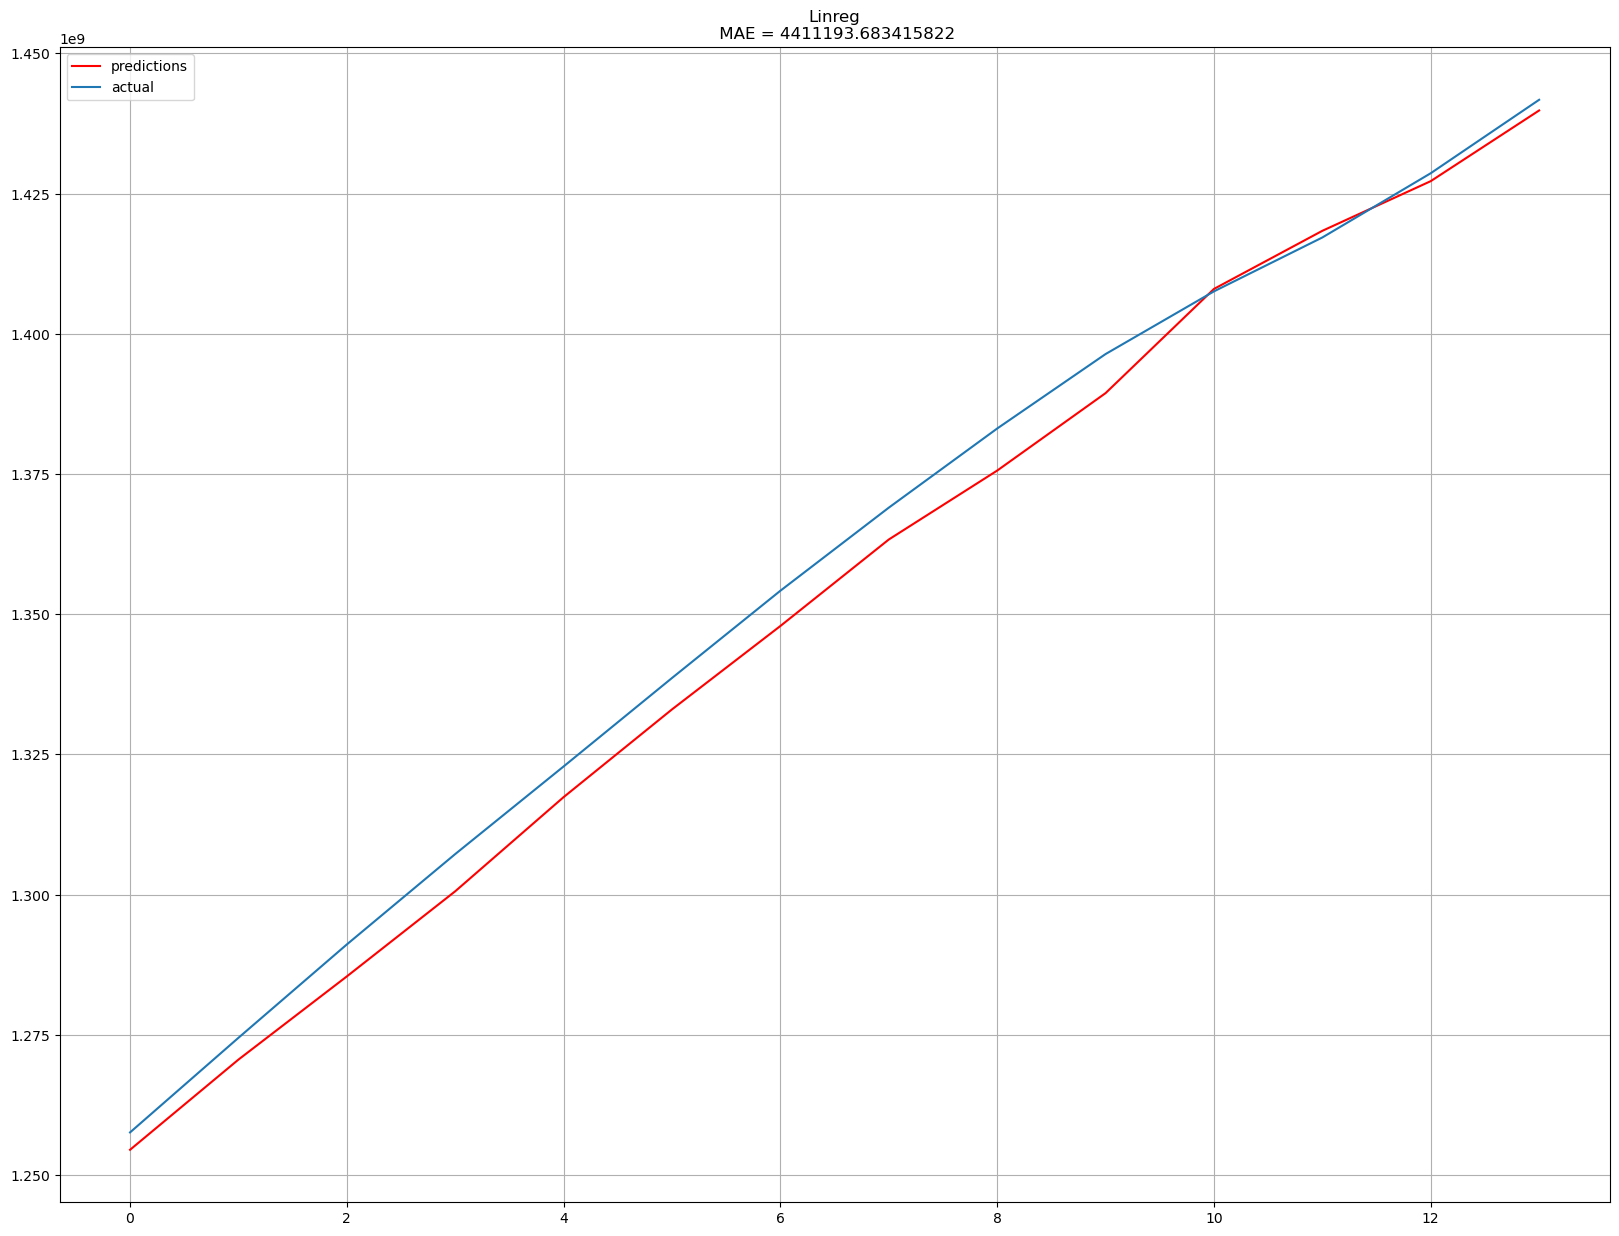

In [15]:
X_train,X_test,y_train,y_test = preprocess_data(df)
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)

plt.figure(figsize=(20,15))
plt.plot(preds,"r",label="predictions")
plt.plot(y_test.values,label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linreg\n MAE = {mean_absolute_error(preds,y_test)}");

In [19]:
future_dates = pd.date_range(start=df.index[-1], periods=5, freq='Y')

# Создание DataFrame для будущих данных
future_data = pd.DataFrame(index=future_dates)
for lag in range(5, 10):
    future_data[f"lag_{lag}"] = df['popu1ation_growth_rate'].shift(lag).values[-len(future_data):]

future_data['year'] = future_data.index.year
future_data = future_data.dropna()
future_data

,lag_5,lag_6,lag_7,lag_8,lag_9,year
2024-12-31,1.322867e+09,1.307247e+09,1.291132e+09,1.274487e+09,1.257621e+09,2024
2025-12-31,1.338636e+09,1.322867e+09,1.307247e+09,1.291132e+09,1.274487e+09,2025
2026-12-31,1.354196e+09,1.338636e+09,1.322867e+09,1.307247e+09,1.291132e+09,2026
2027-12-31,1.369003e+09,1.354196e+09,1.338636e+09,1.322867e+09,1.307247e+09,2027
2028-12-31,1.383112e+09,1.369003e+09,1.354196e+09,1.338636e+09,1.322867e+09,2028


In [20]:
predictions = lr.predict(future_data)

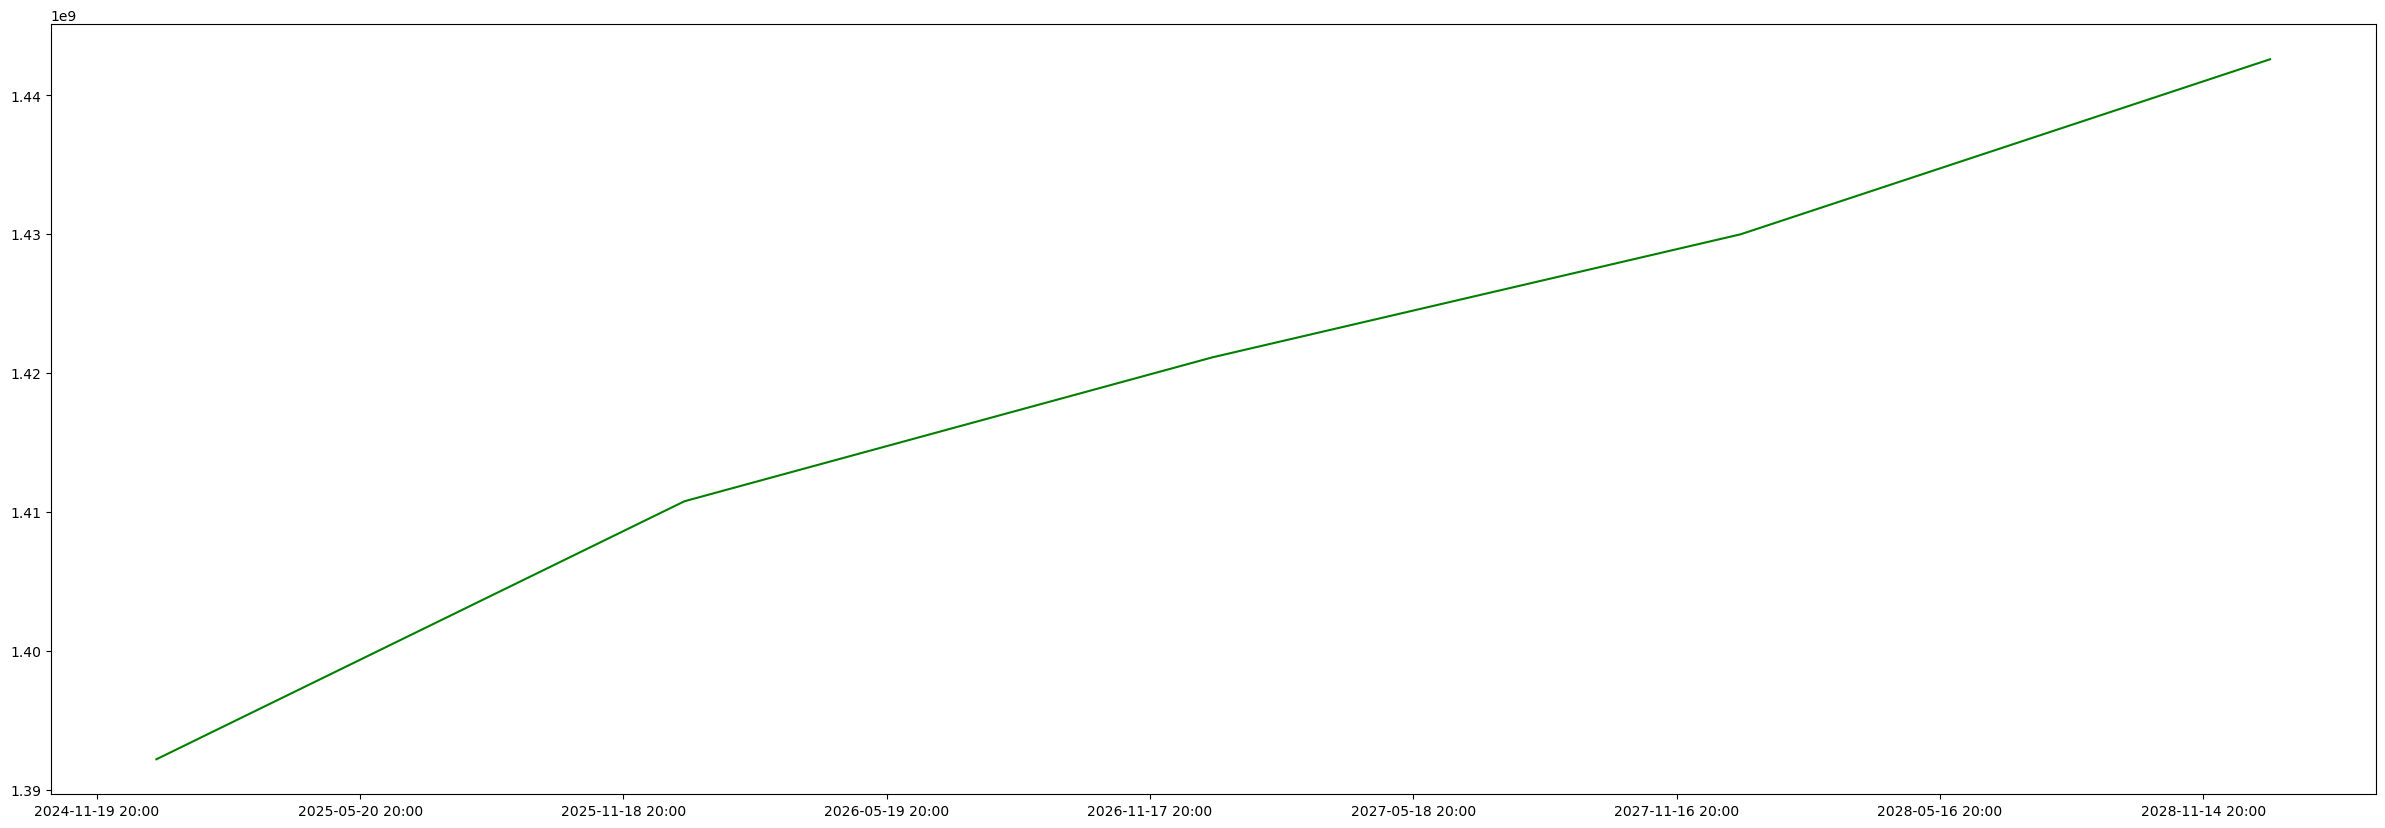

In [24]:
plt.figure(figsize=(30,10))
plt.plot(future_data.index, predictions, label="Future Predictions", color='green')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=24*182)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))